# Building A Handwritten Digits Classifier

In this project, we will build models that can classify handwritten digits.

## Workin with Image Data
Scikit-learn contains a number of datasets pre-loaded with the library. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits_data = load_digits()

In [3]:
digits_data.keys()

dict_keys(['target', 'target_names', 'images', 'data', 'DESCR'])

In [4]:
digits_data['data'].shape

(1797, 64)

In [5]:
digits_data['images'].shape

(1797, 8, 8)

In [6]:
data = pd.DataFrame(digits_data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
target = digits_data['target']

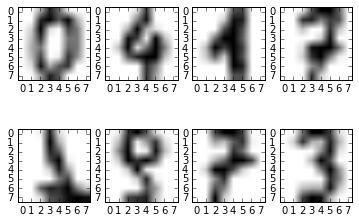

In [8]:
# visualize some of the images in the dataset
fig,axes = plt.subplots(2,4)
for i in range(4):
    image = data.iloc[i*100]
    image_reshape = image.values.reshape(8,8)
    axes[0,i].imshow(image_reshape,cmap = 'gray_r')
for i in range(4):
    image = data.iloc[i*100+1000]
    image_reshape = image.values.reshape(8,8)
    axes[1,i].imshow(image_reshape,cmap = 'gray_r')
plt.show()

## K-Nearest Neighbors Model
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. 

In [9]:
# split data into training and testing data set
np.random.seed(30)
index_shuffled = np.random.permutation(data.index)
row_max = int(len(data)/2)
train_features = data.loc[index_shuffled[:row_max]].copy()
test_features = data.loc[index_shuffled[row_max:]].copy()
train_labels = target[index_shuffled[:row_max]]
test_labels = target[index_shuffled[row_max:]]

In [10]:
# construct a knn model
from sklearn.neighbors import KNeighborsClassifier
def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features,train_labels)
    return knn

In [11]:
# calculate the accuracy of a model on a data set
from sklearn.metrics import accuracy_score
def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy

In [12]:
# train a knn model using 5 nearest observations
model = train(5,train_features,train_labels)
accuracy = test(model,test_features,test_labels)
accuracy

0.982202447163515

In [13]:
# use kfold to do 4-fold cross validation
from sklearn.model_selection import KFold
def cross_validation(data, target,nneighbors):
    kf = KFold(n_splits=4,random_state=30, shuffle=True)
    train_accuracy_scores = []
    test_accuracy_scores = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target[train_index]
        test_labels = target[test_index]
        model = train(nneighbors,train_features,train_labels)
        test_accuracy = test(model,test_features,test_labels)
        train_accuracy = test(model,train_features, train_labels)
        train_accuracy_scores.append(train_accuracy)
        test_accuracy_scores.append(test_accuracy)
    train_accuracy_avg = np.mean(train_accuracy_scores)
    test_accuracy_avg = np.mean(test_accuracy_scores)
    return train_accuracy_avg, test_accuracy_avg

In [14]:
import time

In [15]:
# train knn models using cross validation to change the number of neighbors.
t = time.time()
nneighbors_list = list(range(1,10))
train_accuracy_nneighbors = []
test_accuracy_nneighbors = []
for nneighbors in nneighbors_list:
    train_accuracy_avg,test_accuracy_avg = cross_validation(data,target,nneighbors)
    train_accuracy_nneighbors.append(train_accuracy_avg)
    test_accuracy_nneighbors.append(test_accuracy_avg)
elapsed = time.time() - t

In [16]:
print('time to train knn models with cross validation:')
print(elapsed,'s')
print('mean accuracy on train sets:')
print(np.mean(train_accuracy_nneighbors))
print('mean accuracy on test sets')
print(np.mean(test_accuracy_nneighbors))

time to train knn models with cross validation:
9.468779802322388 s
mean accuracy on train sets:
0.9909313867673362
mean accuracy on test sets
0.983799664549479


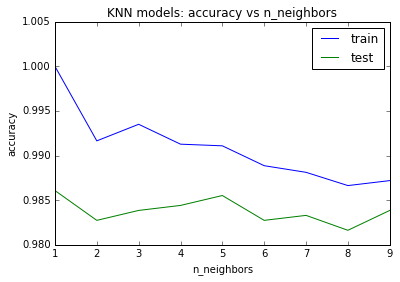

In [17]:
# plot accuracy versus number of neighbors with knn models
plt.plot(nneighbors_list,train_accuracy_nneighbors)
plt.plot(nneighbors_list,test_accuracy_nneighbors)
plt.legend(['train','test'])
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN models: accuracy vs n_neighbors')
plt.show()

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

## Neural Network with one hidden layer

We will using 4-fold cross validation to train and test neural network models using a single hidden layer of 8,16,32,64,128 neurons

In [18]:
# with the pipeline to construct neural network models with one hidden layer
# use cross validation to tune number of neurons for neural network model
from sklearn.neural_network import MLPClassifier
def train_nn(nneurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = (nneurons,))
    mlp.fit(train_features,train_labels)
    return mlp
def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy
def cross_validation(data, target,nneurons):
    kf = KFold(n_splits=4,random_state=30, shuffle=True)
    test_accuracy_scores = []
    train_accuracy_scores = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target[train_index]
        test_labels = target[test_index]
        model = train_nn(nneurons,train_features,train_labels)
        test_accuracy = test(model,test_features,test_labels)
        train_accuracy = test(model,train_features, train_labels)
        test_accuracy_scores.append(test_accuracy)
        train_accuracy_scores.append(train_accuracy)
    test_accuracy_avg = np.mean(test_accuracy_scores)
    train_accuracy_avg = np.mean(train_accuracy_scores)
    return train_accuracy_avg, test_accuracy_avg

In [19]:
# train neural network models
t = time.time()
nneurons_list = [8, 16, 32, 64, 128]
train_accuracy_nneurons = []
test_accuracy_nneurons = []
for nneurons in nneurons_list:
    train_accuracy_avg,test_accuracy_avg = cross_validation(data,target,nneurons)
    train_accuracy_nneurons.append(train_accuracy_avg)
    test_accuracy_nneurons.append(test_accuracy_avg)
elapsed = time.time() - t

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [20]:
print('time to train neural network models with single hidden layer using cross validation:')
print(elapsed,'s')
print('mean accuracy on train sets:')
print(np.mean(train_accuracy_nneurons))
print('mean accuracy on test sets')
print(np.mean(test_accuracy_nneurons))

time to train neural network models with single hidden layer using cross validation:
260.7039542198181 s
mean accuracy on train sets:
0.9938787204888764
mean accuracy on test sets
0.9597047760455333


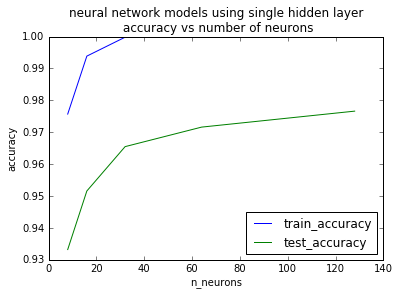

In [21]:
# plot accuracy versus number of neurons with neural network models
plt.plot(nneurons_list,train_accuracy_nneurons)
plt.plot(nneurons_list,test_accuracy_nneurons)
plt.legend(['train_accuracy','test_accuracy'], loc = 'lower right')
plt.xlabel('n_neurons')
plt.ylabel('accuracy')
plt.title('neural network models using single hidden layer\n accuracy vs number of neurons')
plt.show()

The accuracy of neural network models increases from 0.93 to 0.97 approximately as number of neurons changes from 8 to 128, but the models overfit the data since the accuracy of models on training set almost reaches 1 when there are 16 neurons or more.
And it seems that neural network models do not perform better than knn models whose accuracy can achive 0.98 from previous experiments.

## Neural Network with Two Hidden Layers

In [22]:
#construct neural network models with two hidden layers
def train_nn_2(nneurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = (nneurons, nneurons))
    mlp.fit(train_features,train_labels)
    return mlp
def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy
def cross_validation(data, target,nneurons):
    kf = KFold(n_splits=4,random_state=30, shuffle=True)
    test_accuracy_scores = []
    train_accuracy_scores = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target[train_index]
        test_labels = target[test_index]
        model = train_nn_2(nneurons,train_features,train_labels)
        test_accuracy = test(model,test_features,test_labels)
        train_accuracy = test(model,train_features, train_labels)
        test_accuracy_scores.append(test_accuracy)
        train_accuracy_scores.append(train_accuracy)
    test_accuracy_avg = np.mean(test_accuracy_scores)
    train_accuracy_avg = np.mean(train_accuracy_scores)
    return train_accuracy_avg, test_accuracy_avg

In [24]:
# train models
t = time.time()
nneurons_list = [8,16,32,64,128]
train_accuracy_nneurons = []
test_accuracy_nneurons = []
for nneurons in nneurons_list:
    train_accuracy_avg,test_accuracy_avg = cross_validation(data,target,nneurons)
    train_accuracy_nneurons.append(train_accuracy_avg)
    test_accuracy_nneurons.append(test_accuracy_avg)
elapsed = time.time() - t

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [25]:
print('time to train neural network models with two hidden layers using cross validation:')
print(elapsed, 's')
print('mean accuracy on train sets:')
print(np.mean(train_accuracy_nneurons))
print('mean accuracy on test sets')
print(np.mean(test_accuracy_nneurons))

time to train neural network models with two hidden layers using cross validation:
311.5720498561859 s
mean accuracy on train sets:
0.9926178131863532
mean accuracy on test sets
0.9557008166295471


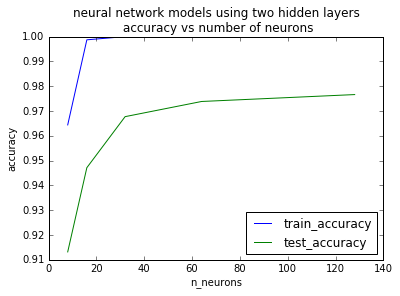

In [26]:
# plot accuracy versus number of neurons with neural network models
plt.plot(nneurons_list,train_accuracy_nneurons)
plt.plot(nneurons_list,test_accuracy_nneurons)
plt.legend(['train_accuracy','test_accuracy'], loc = 'lower right')
plt.xlabel('n_neurons')
plt.ylabel('accuracy')
plt.title('neural network models using two hidden layers\n accuracy vs number of neurons')
plt.show()

the accuracy of neural network models with two hidden layers is about 0.97, and the models tend to overfit. 

## Neural Network With Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [27]:
#construct neural network models with two hidden layers
def train_nn_3(nneurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = (nneurons, nneurons,nneurons))
    mlp.fit(train_features,train_labels)
    return mlp
def test(model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    return accuracy
def cross_validation(data, target,nneurons):
    kf = KFold(n_splits=6,random_state=30, shuffle=True)
    test_accuracy_scores = []
    train_accuracy_scores = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        train_labels = target[train_index]
        test_labels = target[test_index]
        model = train_nn_3(nneurons,train_features,train_labels)
        test_accuracy = test(model,test_features,test_labels)
        train_accuracy = test(model,train_features, train_labels)
        test_accuracy_scores.append(test_accuracy)
        train_accuracy_scores.append(train_accuracy)
    test_accuracy_avg = np.mean(test_accuracy_scores)
    train_accuracy_avg = np.mean(train_accuracy_scores)
    return train_accuracy_avg, test_accuracy_avg

In [29]:
# train models
t = time.time()
nneurons_list = [8, 16, 32, 64,128]
train_accuracy_nneurons = []
test_accuracy_nneurons = []
for nneurons in nneurons_list:
    print(nneurons)
    train_accuracy_avg,test_accuracy_avg = cross_validation(data,target,nneurons)
    train_accuracy_nneurons.append(train_accuracy_avg)
    test_accuracy_nneurons.append(test_accuracy_avg)
elapsed = time.time() - t

8


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



16
32
64
128


In [30]:
print('time to train neural network models with three hidden layers using cross validation:')
print(elapsed,'s')
print('mean accuracy on train sets:')
print(np.mean(train_accuracy_nneurons))
print('mean accuracy on test sets')
print(np.mean(test_accuracy_nneurons))

time to train neural network models with three hidden layers using cross validation:
456.3221654891968 s
mean accuracy on train sets:
0.9945025044897686
mean accuracy on test sets
0.9623786696395392


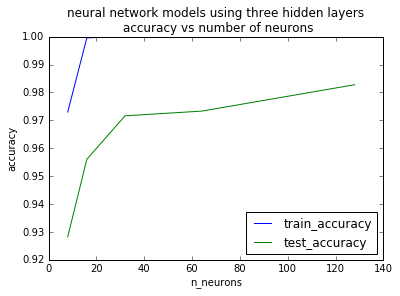

In [31]:
# plot accuracy versus number of neurons with neural network models
plt.plot(nneurons_list,train_accuracy_nneurons)
plt.plot(nneurons_list,test_accuracy_nneurons)
plt.legend(['train_accuracy','test_accuracy'], loc = 'lower right')
plt.xlabel('n_neurons')
plt.ylabel('accuracy')
plt.title('neural network models using three hidden layers\n accuracy vs number of neurons')
plt.show()

Conclusion:

For neural network models with single, two and three hidden layers, the mean accuracies on training dataset are about 0.959, 0.955 and 0.962. The mean accuracy for knn models is about 0.98. Newral network models are time consuming as the number of neurons increases. knn models seem to work better.